<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_x                        32094 non-null  int64  
 1   amount                      32094 non-null  float64
 2   status_x                    32094 non-null  object 
 3   created_at_x                32094 non-null  object 
 4   updated_at_x                32094 non-null  object 
 5   user_id                     29522 non-null  float64
 6   moderated_at                21759 non-null  object 
 7   deleted_account_id          2573 non-null   float64
 8   reimbursement_date          32094 non-null  object 
 9   cash_request_received_date  24149 non-null  object 
 10  money_back_date             23917 non-null  object 
 11  transfer_type               32094 non-null  object 
 12  send_at                     22678 non-null  object 
 13  recovery_status             720

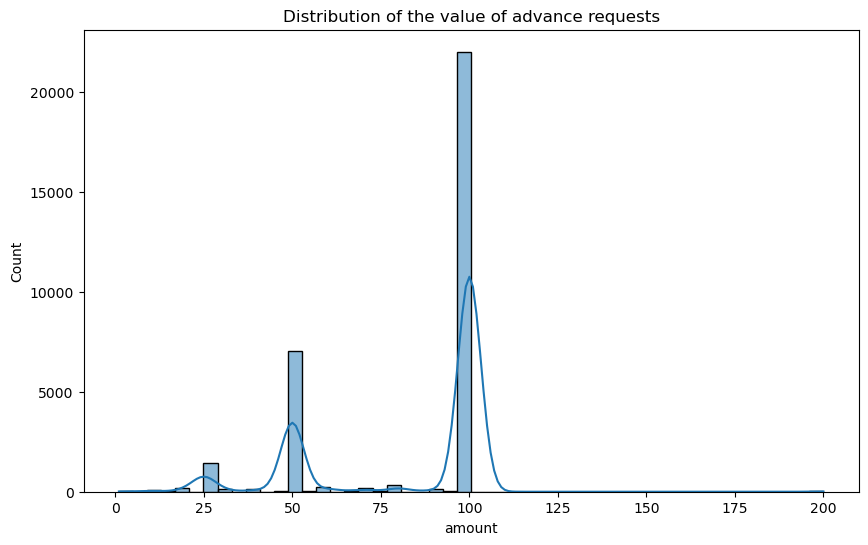

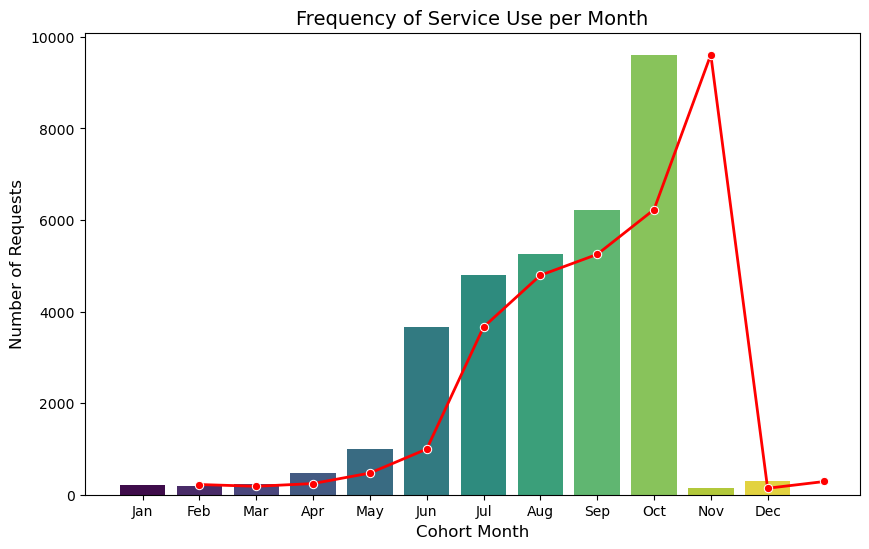

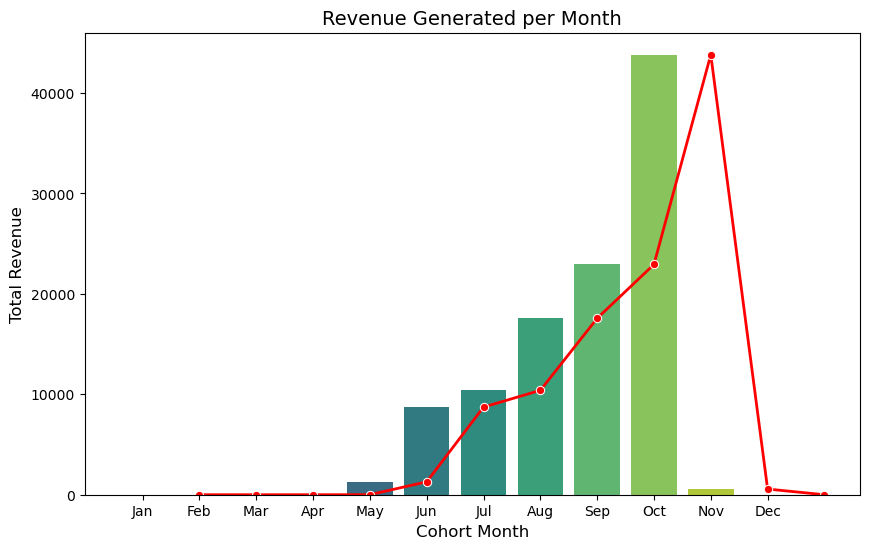

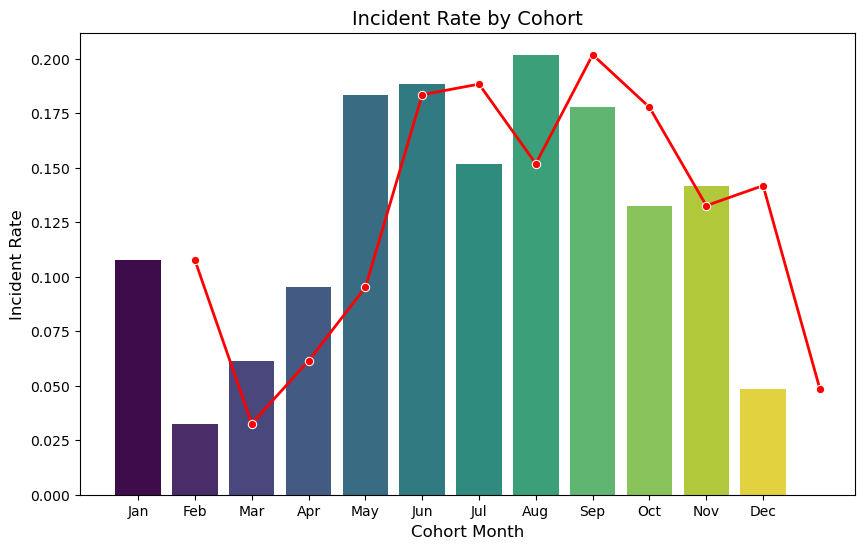

Frequency of service use by cohort:
month
1      223
2      184
3      244
4      473
5      997
6     3662
7     4793
8     5250
9     6227
10    9611
11     141
12     289
Name: id_x, dtype: int64
Revenue generated by cohort:
month
1         0.0
2         0.0
3         0.0
4         5.0
5      1285.0
6      8725.0
7     10395.0
8     17565.0
9     22935.0
10    43815.0
11      565.0
12        0.0
Name: total_amount, dtype: float64
Incident rate by cohort:
month
1     0.107623
2     0.032609
3     0.061475
4     0.095137
5     0.183551
6     0.188422
7     0.151888
8     0.201905
9     0.177774
10    0.132660
11    0.141844
12    0.048443
Name: id_x, dtype: float64
None
None
Values of 'time_to_reimbursement' after calculation:
0    30.0
1    30.0
2    30.0
3    30.0
4     NaN
Name: time_to_reimbursement, dtype: float64
Null values in 'time_to_reimbursement': 28033
None
None
Values of 'time_to_reimbursement' after calculation:


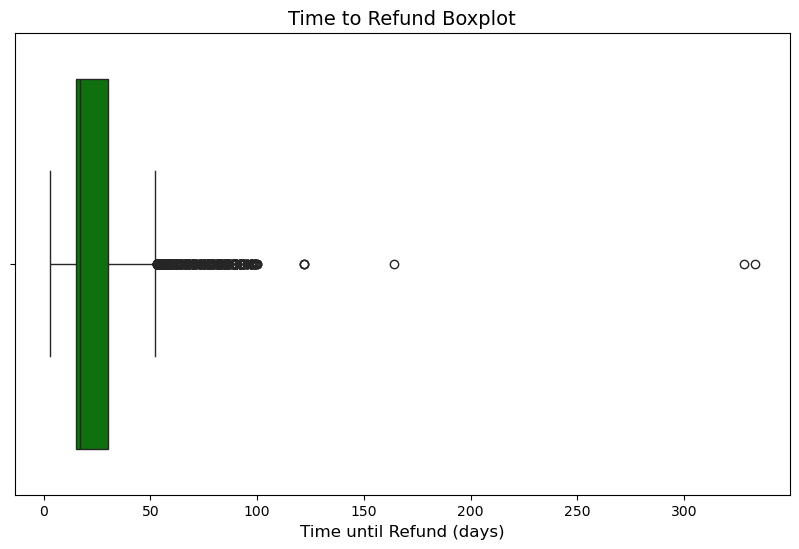

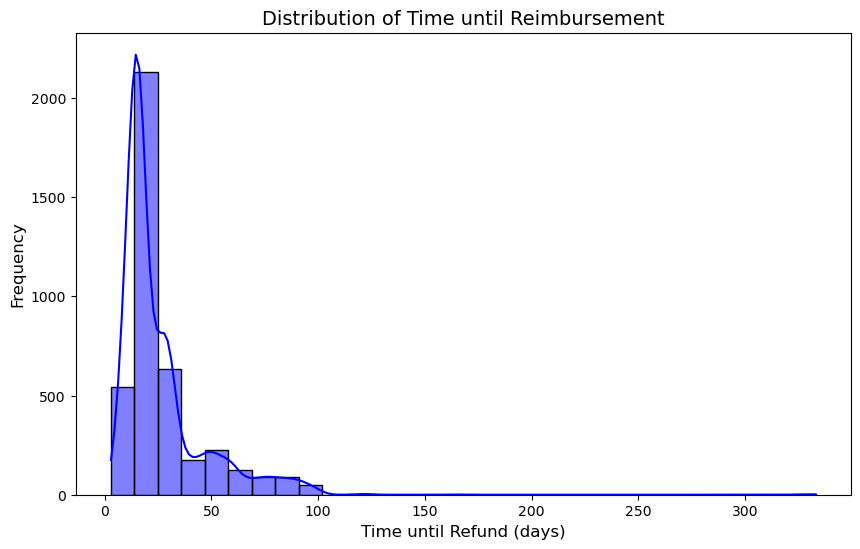

In [1]:
# %% [markdown]
# Business Understanding
# %%
# objective
""" 1. how often users from different cohorts use the cash advance services.(Frequency of service usage over the time - trend analysis - bar chart)
    2. Incident rate for payment-related issues across cohorts (trend variation to understand in which periods this appear and for each cohort)
    3. Revenue Analysis over the time: total revenue generated by each cohort over months to assess the financial impact of user behavior (trend)
4.New Metric to track this:
- how long time to happen the first incident rate / min and max
- avg of users that need the cash advance
-measure of insights into user behavior or the performance of IronHack Payments' services.
Columns_to_use:
    track the data of first request - [id,amount,created_at,updated_at,user_id,status]
    revenue analysis = transfer_type,cash_request_received_date,
    incident rate = [deleted_account_i, reimbursement_date (charge_date),recovery_status,reco_last_update]
"""
# %% [markdown]
# Data Mining
# %%
#Libraries used for this project
import pandas as pd # painel data, dataframes
import numpy as np  # numerical data
import os # manage directories folders
import seaborn as sns # visualization
from datetime import datetime # format dates
from openpyxl import load_workbook # excel file with folders/tabs
# %% [markdown]
# Data Collection
# %%
#dataset1
cash_req = pd.read_csv("extract - cash request - data analyst.csv")
df1 = cash_req.copy()
df1 = pd.DataFrame(df1)
df1
# %%
#dataset2
fee = pd.read_csv("extract - fees - data analyst - .csv")
df2 = fee.copy()
df2 = pd.DataFrame(df2)
df2
# %%
df3_path = "Lexique - Data Analyst.xlsx" # sourcefile
df3 = pd.read_excel(df3_path) # coverting into dataframe
df3_workbook = load_workbook(df3_path) # open the workbook
cash_request_workbook = df3_workbook.worksheets[1] # acessing to the second folder of the workbook
cash_request_workbook
fees_workbook = df3_workbook.worksheets[0] # acessing to the first folder of the workbook
fees_workbook
df3_cash_request = []
for row in cash_request_workbook.iter_rows(values_only=True):
    df3_cash_request.append(row) # junta todas as rows ao dicionario vazio
df3_cash_request = pd.DataFrame(df3_cash_request)
df3_cash_request
df3_fees = []
for row in fees_workbook.iter_rows(values_only=True):
    df3_fees.append(row)
df3_fees = pd.DataFrame(df3_fees)
df3_fees.head(13)
df3
# %%
merged_df = pd.merge(df1,df2,how='left',left_on='id',right_on='cash_request_id')
merged_df # left join based on the id
merged_df.head()
merged_df2 = merged_df.copy()
# %%
merged_df2.info()
merged_df2.isnull().mean()
# %%
merged_df.isnull().mean()
merged_df.duplicated().sum()
(merged_df =='').sum() # no spaces on the dataframe
# %%
import matplotlib.pyplot as plt # review
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['amount'], kde=True, bins=50)
plt.title('Distribution of the value of advance requests')
plt.show()
# %%
merged_df2 = merged_df2[['id_x','created_at_x', 'total_amount', 'recovery_status', 'reimbursement_date']]
merged_df2.head() # columns to keep
merged_df2.isnull().mean()
#merged_df2.dtypes
# %%
merged_df2['total_amount'] = merged_df2['total_amount'].fillna(0)
merged_df2['total_amount'].isnull().mean()
merged_df2['recovery_status'] = merged_df2['recovery_status'].fillna("Not Aplicable")
merged_df2['recovery_status'].isnull().mean()
merged_df2['created_at_x'] = pd.to_datetime(merged_df2['created_at_x'], errors='coerce')
merged_df2['created_at_x'] = merged_df2['created_at_x'].dt.strftime("%Y/%m/%d")
merged_df2['created_at_x'] = pd.to_datetime(merged_df2['created_at_x'],format="%Y/%m/%d")
merged_df2['reimbursement_date'] = pd.to_datetime(merged_df2['reimbursement_date'], errors='coerce')
merged_df2['reimbursement_date'] = merged_df2['reimbursement_date'].dt.strftime('%Y/%m/%d')
merged_df2['reimbursement_date'] = pd.to_datetime(merged_df2['reimbursement_date'], format='%Y/%m/%d')
merged_df2.dtypes
merged_df2.isnull().mean()
# alternative way
# merged_df2['reimbursement_date'] = merged_df2['reimbursement_date'].apply(lambda x:x.date().strftime("%Y/%m/%d"))
# %%
# Month Column
merged_df2['month'] = merged_df2['created_at_x'].dt.month
merged_df2
cohort_counts = merged_df2.groupby('month')['id_x'].count()
cohort_counts
plt.figure(figsize=(10, 6))
# Criando o barplot para cohort_counts
sns.barplot(x=cohort_counts.index, y=cohort_counts.values,
            palette='viridis', hue=cohort_counts.index, legend=False)
# Criando a linha de tendência para cohort_counts
sns.lineplot(x=cohort_counts.index, y=cohort_counts.values, color='red', marker='o', linewidth=2)
# Adicionando títulos e rótulos
plt.title('Frequency of Service Use per Month', fontsize=14)
plt.xlabel('Cohort Month', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
# Personalizando os rótulos do eixo x para meses
plt.xticks(ticks=range(len(cohort_counts.index)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Exibindo o gráfico
plt.show()
# %%
cohort_revenue = merged_df2.groupby('month')['total_amount'].sum()
cohort_revenue
cohort_revenue = merged_df2.groupby('month')['total_amount'].sum()
# Visualização do cohort_revenue
plt.figure(figsize=(10, 6))
# Criando o barplot para cohort_revenue
sns.barplot(x=cohort_revenue.index, y=cohort_revenue.values,
            palette='viridis', hue=cohort_revenue.index, legend=False)
# Criando a linha de tendência para cohort_revenue
sns.lineplot(x=cohort_revenue.index, y=cohort_revenue.values, color='red', marker='o', linewidth=2)
# Adicionando títulos e rótulos
plt.title('Revenue Generated per Month', fontsize=14)
plt.xlabel('Cohort Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
# Personalizando os rótulos do eixo x para meses
plt.xticks(ticks=range(len(cohort_revenue.index)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Exibindo o gráfico
plt.show()
# %%
merged_df.isnull().mean()
# merged_clean_df_cohort_analysis = merged_df[['created_at_x', 'paid_at', 'total_amount', 'recovery_status'])
# %%
merged_df2
# %%
""" # Convert 'paid_at' to datetime if not already
merged_df2['paid_at'] = pd.to_datetime(merged_df2['paid_at'])
# Extract the year, quarter, month, and bi-annual period from 'paid_at'
merged_df2['year'] = merged_df2['paid_at'].dt.year
merged_df2['quarter'] = merged_df2['paid_at'].dt.to_period('Q')
merged_df2['semester'] = (merged_df2['paid_at'].dt.month - 1) // 6 + 1
merged_df2['month'] = merged_df2['paid_at'].dt.month
# Calculate total revenue per cohort for each period type
monthly_revenue = merged_df2.groupby(['month', 'month']).agg({'total_amount': 'sum'}).reset_index()
quarterly_revenue = merged_df2.groupby(['quarter']).agg({'total_amount': 'sum'}).reset_index()
semester_revenue = merged_df2.groupby(['semester']).agg({'total_amount': 'sum'}).reset_index()
annual_revenue = merged_df2.groupby(['year']).agg({'total_amount': 'sum'}).reset_index()
# Plotting the cohort revenue
plt.figure(figsize=(12, 6))
# Plot monthly revenue
sns.barplot(x='month', y='total_amount', data=monthly_revenue, color='blue', label='Monthly Revenue')
# Plot quarterly revenue
sns.barplot(x='quarter', y='total_amount', data=quarterly_revenue, color='green', label='Quarterly Revenue')
# Plot semester revenue
sns.barplot(x='semester', y='total_amount', data=semester_revenue, color='orange', label='Semester Revenue')
# Plot annual revenue
sns.barplot(x='year', y='total_amount', data=annual_revenue, color='purple', label='Annual Revenue')
# Customize plot
plt.title('Cohort Revenue per Time Period', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Revenue (in currency)', fontsize=12)
plt.legend()
plt.show()"""
# %%
# Calculate the incident rate
incident_rate = merged_df2[merged_df2['recovery_status'] == 'completed'].groupby('month')['id_x'].count() / cohort_counts
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=incident_rate.index, y=incident_rate.values,
            hue=incident_rate.index, palette='viridis', legend=False)
sns.lineplot(x=incident_rate.index, y=incident_rate.values, color='red', marker='o', linewidth=2)
plt.title('Incident Rate by Cohort', fontsize=14)
plt.xlabel('Cohort Month', fontsize=12)
plt.ylabel('Incident Rate', fontsize=12)
# Customize x-axis labels for months
plt.xticks(ticks=range(len(incident_rate.index)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Display the plot
plt.show()
# %%
print("Frequency of service use by cohort:")
print(cohort_counts)
print("Revenue generated by cohort:")
print(cohort_revenue)
print("Incident rate by cohort:")
print(incident_rate)
# %%
print(merged_df2['created_at_x'].dt.tz)
print(merged_df2['reimbursement_date'].dt.tz)
# %%
# Calcular a diferença entre 'reimbursement_date' e 'created_at_x'
merged_df2['time_to_reimbursement'] = (merged_df2['reimbursement_date'] - merged_df2['created_at_x']).dt.days
# Verificar os valores da coluna 'time_to_reimbursement'
print("Values of 'time_to_reimbursement' after calculation:")
print(merged_df2['time_to_reimbursement'].head())
# Checar valores nulos na coluna 'time_to_reimbursement'
print("Null values in 'time_to_reimbursement':", merged_df2['time_to_reimbursement'].isnull().sum())
plt.show()
# %%
print(merged_df2['created_at_x'].dt.tz)
print(merged_df2['reimbursement_date'].dt.tz)
# %%
# Remover linhas com valores nulos nas colunas 'created_at_x' e 'reimbursement_date'
merged_df2_clean = merged_df2.dropna(subset=['created_at_x', 'reimbursement_date'])
merged_df2_clean
(merged_df2_clean['reimbursement_date'] - merged_df2_clean['created_at_x']).dt.days
print("Values of 'time_to_reimbursement' after calculation:")
merged_df2_clean['time_to_reimbursement'].head(20)
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df2_clean['time_to_reimbursement'], color='green')
plt.title('Time to Refund Boxplot', fontsize=14)
plt.xlabel('Time until Refund (days)', fontsize=12)
plt.show()
# %%
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(merged_df2_clean['time_to_reimbursement'], kde=True, color='blue', bins=30)
plt.title('Distribution of Time until Reimbursement', fontsize=14)
plt.xlabel('Time until Refund (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [409]:
import pandas as pd # painel data, dataframes
import numpy as np  # numerical data
import os # manage directories folders
import seaborn as sns # visualization
from datetime import datetime # format dates
from openpyxl import load_workbook # excel file with folders/tabs

# %% [markdown]
# Data Collection
# %%

#dataset1

#Se lee un archivo CSV con datos relacionados con solicitudes de efectivo
cash_req = pd.read_csv("extract - cash request - data analyst.csv")

#Se copia el dataframe para trabajar sin modificar el original:
df1 = cash_req.copy()
df1 = pd.DataFrame(df1)
df1

# %%
#dataset2

#Se lee otro archivo CSV con información sobre tarifas:
fee = pd.read_csv("extract - fees - data analyst - .csv")

#Se convierte a un dataframe y se almacena en df2.
df2 = fee.copy()
df2 = pd.DataFrame(df2)
df2

"""
# %%
df3_path = "Lexique - Data Analyst.xlsx" # sourcefile
df3 = pd.read_excel(df3_path) # coverting into dataframe
df3_workbook = load_workbook(df3_path) # open the workbook
cash_request_workbook = df3_workbook.worksheets[1] # acessing to the second folder of the workbook
cash_request_workbook
fees_workbook = df3_workbook.worksheets[0] # acessing to the first folder of the workbook
fees_workbook
df3_cash_request = []
for row in cash_request_workbook.iter_rows(values_only=True):
    df3_cash_request.append(row) # junta todas as rows ao dicionario vazio
df3_cash_request = pd.DataFrame(df3_cash_request)
df3_cash_request
df3_fees = []
for row in fees_workbook.iter_rows(values_only=True):
    df3_fees.append(row)
df3_fees = pd.DataFrame(df3_fees)
df3_fees.head(13)
df3
"""

# %% Se realiza un merge (combinación de tablas) entre df1 y df2, usando una "unión izquierda" basada en las claves id y cash_request_id:
merged_df = pd.merge(df1,df2,how='left',left_on='id',right_on='cash_request_id')
merged_df # left join based on the id
merged_df.head()
merged_df2 = merged_df.copy()

# %%

merged_df2.info() # Información básica del dataframe combinado:
merged_df2.isnull().mean() # Proporción de valores nulos en cada columna:

# %%
merged_df.isnull().mean()
merged_df.duplicated().sum() # Detección de duplicados:
(merged_df =='').sum() # Revisión de espacios vacíos: no spaces on the dataframe

# %%
"""
import matplotlib.pyplot as plt # review
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['amount'], kde=True, bins=50)
plt.title('Distribuição do valor das solicitações de adiantamento')
plt.show()
"""

# %%
merged_df2 = merged_df2[['id_x','created_at_x', 'total_amount', 'recovery_status', 'reimbursement_date']]
merged_df2.head() # columns to keep
merged_df2.isnull().mean()
#merged_df2.dtypes
#merged_df2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_x                        32094 non-null  int64  
 1   amount                      32094 non-null  float64
 2   status_x                    32094 non-null  object 
 3   created_at_x                32094 non-null  object 
 4   updated_at_x                32094 non-null  object 
 5   user_id                     29522 non-null  float64
 6   moderated_at                21759 non-null  object 
 7   deleted_account_id          2573 non-null   float64
 8   reimbursement_date          32094 non-null  object 
 9   cash_request_received_date  24149 non-null  object 
 10  money_back_date             23917 non-null  object 
 11  transfer_type               32094 non-null  object 
 12  send_at                     22678 non-null  object 
 13  recovery_status             720

id_x                  0.000000
created_at_x          0.000000
total_amount          0.343896
recovery_status       0.775659
reimbursement_date    0.000000
dtype: float64

In [413]:
merged_df2

,id_x,created_at_x,total_amount,recovery_status,reimbursement_date
0,5,2019-12-10 19:05:21.596873+00,NaN,NaN,2020-01-09 19:05:21.596363+00
1,70,2019-12-10 19:50:12.34778+00,NaN,NaN,2020-01-09 19:50:12.34778+00
2,7,2019-12-10 19:13:35.82546+00,NaN,NaN,2020-01-09 19:13:35.825041+00
3,10,2019-12-10 19:16:10.880172+00,NaN,NaN,2020-01-09 19:16:10.879606+00
4,1594,2020-05-06 09:59:38.877376+00,NaN,NaN,2020-06-05 22:00:00+00
...,...,...,...,...,...
32089,22357,2020-10-20 07:58:04.006937+00,5.0,NaN,2021-02-05 11:00:00+00
32090,20256,2020-10-10 05:40:55.700422+00,5.0,NaN,2021-02-05 11:00:00+00
32091,20256,2020-10-10 05:40:55.700422+00,5.0,NaN,2021-02-05 11:00:00+00
32092,19886,2020-10-08 14:16:52.155661+00,5.0,NaN,2021-02-05 11:00:00+00


In [431]:
#Calcular ingresos generados por cohortes

# Convertir la columna de fechas a tipo datetime
merged_df2['created_at_x'] = pd.to_datetime(merged_df2['created_at_x'])

# Crear una columna de cohorte basada en el mes y año de registro
merged_df2['cohort'] = merged_df2['created_at_x'].dt.to_period('M')

# Calcular los ingresos totales generados por cohorte
cohort_revenue = merged_df2.groupby('cohort')['total_amount'].sum().reset_index()

# Renombrar columnas
cohort_revenue.columns = ['Cohorte', 'Ingresos Totales']

# Convertirlo a Dataframe
df_cohort_revenue = pd.DataFrame(cohort_revenue)
df_cohort_revenue = df_cohort_revenue.set_index("Cohorte")

# Mostrar los resultados
df_cohort_revenue.T


C:\Users\EliteBook\AppData\Local\Temp\ipykernel_26244\2759623616.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df2['cohort'] = merged_df2['created_at_x'].dt.to_period('M')


Cohorte,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Ingresos Totales,0.0,0.0,0.0,0.0,0.0,5.0,1285.0,8725.0,10395.0,17565.0,22935.0,43815.0,565.0


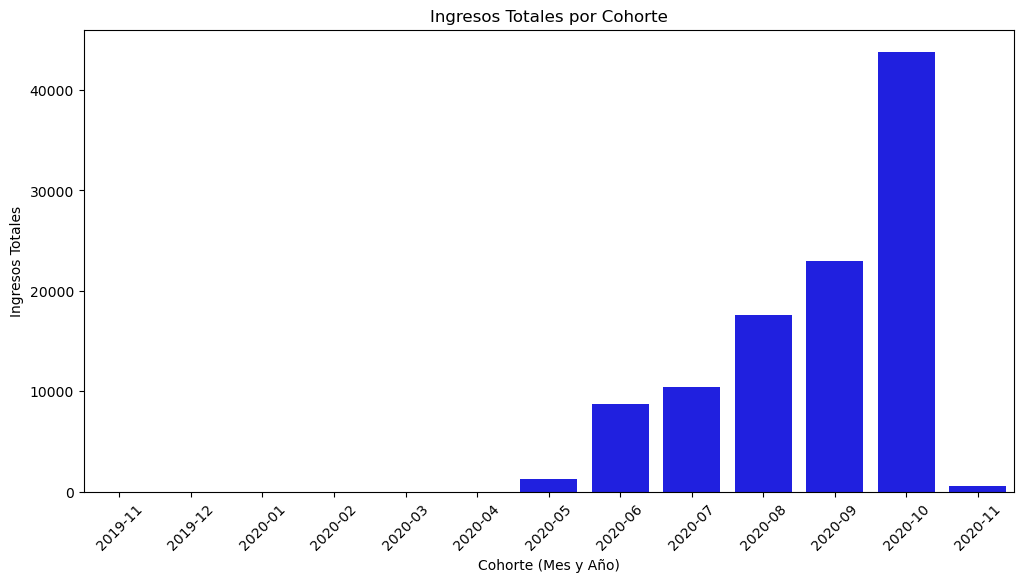

In [421]:
# Visualización de resultados

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_revenue, x='Cohorte', y='Ingresos Totales', color='blue')
plt.title('Ingresos Totales por Cohorte')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()

In [407]:
# Proponer y calcular un nuevo métrico relevante
# Nuevo métrica: Tasa de recuperación exitosa

# Calcular la cantidad total de solicitudes por cohorte
cohort_counts = merged_df2.groupby('cohort')['id_x'].count().reset_index()
cohort_counts.columns = ['Cohorte', 'Total Solicitudes']

# Calcular la cantidad de solicitudes recuperadas con éxito por cohorte
successful_recoveries = merged_df2[merged_df2['recovery_status'] == 'successful'].groupby('cohort')['id_x'].count().reset_index()
successful_recoveries.columns = ['Cohorte', 'Recuperaciones Exitosas']

# Combinar los dos resultados en un dataframe
cohort_metrics = pd.merge(cohort_counts, successful_recoveries, on='Cohorte')

# Calcular la tasa de recuperación exitosa
cohort_metrics['Tasa de Recuperación Exitosa'] = cohort_metrics['Recuperaciones Exitosas'] / cohort_metrics['Total Solicitudes']

# Llenar valores nulos con 0 para cohortes sin recuperaciones exitosas
cohort_metrics['Recuperaciones Exitosas'].fillna(0, inplace=True)
cohort_metrics['Tasa de Recuperación Exitosa'].fillna(0, inplace=True)
cohort_metrics['Recuperaciones Exitosas'] = cohort_metrics['Recuperaciones Exitosas'].fillna(0)
cohort_metrics['Tasa de Recuperación Exitosa'] = cohort_metrics['Tasa de Recuperación Exitosa'].fillna(0)

df_cohort_metrics = pd.DataFrame(cohort_metrics)

# Mostrar los resultados
df_cohort_metrics


C:\Users\EliteBook\AppData\Local\Temp\ipykernel_26244\2138421487.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cohort_metrics['Recuperaciones Exitosas'].fillna(0, inplace=True)
C:\Users\EliteBook\AppData\Local\Temp\ipykernel_26244\2138421487.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

,Cohorte,Total Solicitudes,Recuperaciones Exitosas,Tasa de Recuperación Exitosa


     cohort  total_solicitado  total_reembolsado  tasa_reembolso_promedio
0   2019-11               0.0                0.0                      NaN
1   2019-12               0.0                0.0                      NaN
2   2020-01               0.0                0.0                      NaN
3   2020-02               0.0                0.0                      NaN
4   2020-03               0.0                0.0                      NaN
5   2020-04               5.0                5.0                      1.0
6   2020-05            1285.0             1285.0                      1.0
7   2020-06            8725.0             8725.0                      1.0
8   2020-07           10395.0            10395.0                      1.0
9   2020-08           17565.0            17565.0                      1.0
10  2020-09           22935.0            22935.0                      1.0
11  2020-10           43815.0            43815.0                      1.0
12  2020-11             565.0         

TypeError: Invalid object type at position 0

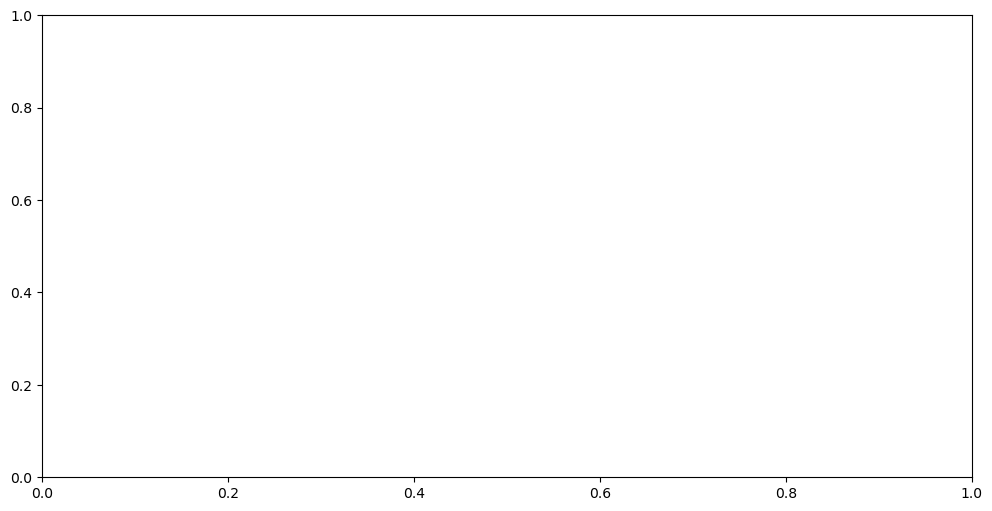

In [385]:
# Crear una columna binaria que indique si la solicitud fue reembolsada
merged_df2['reembolsado'] = ~merged_df2['reimbursement_date'].isnull()

# Asumimos que el monto total reembolsado es igual a `total_amount` para solicitudes con reembolso
merged_df2['monto_reembolsado'] = merged_df2['total_amount'] * merged_df2['reembolsado']



# Calcular la suma del monto reembolsado y el total solicitado por cohorte
cohort_reimbursement = merged_df2.groupby('cohort').agg(
    total_solicitado=('total_amount', 'sum'),
    total_reembolsado=('monto_reembolsado', 'sum')
).reset_index()

# Calcular la tasa de reembolso promedio
cohort_reimbursement['tasa_reembolso_promedio'] = cohort_reimbursement['total_reembolsado'] / cohort_reimbursement['total_solicitado']

# Mostrar los resultados
print(cohort_reimbursement)

   cohort  total_solicitado  total_reembolsado  tasa_reembolso_promedio
5     NaT               5.0                5.0                      1.0
6     NaT            1285.0             1285.0                      1.0
7     NaT            8725.0             8725.0                      1.0
8     NaT           10395.0            10395.0                      1.0
9     NaT           17565.0            17565.0                      1.0
10    NaT           22935.0            22935.0                      1.0
11    NaT           43815.0            43815.0                      1.0
12    NaT             565.0              565.0                      1.0


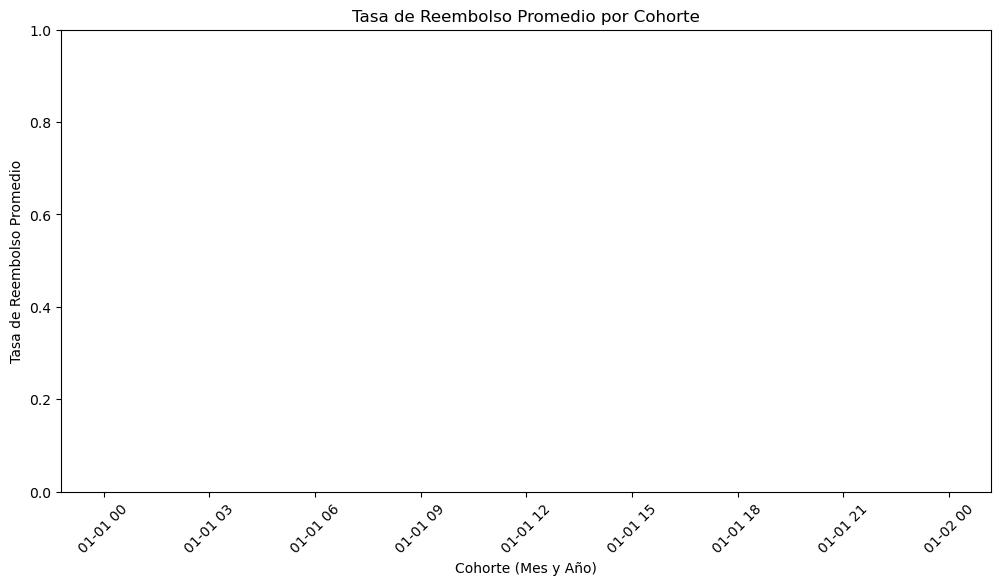

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una columna binaria que indique si la solicitud fue reembolsada
merged_df2['reembolsado'] = ~merged_df2['reimbursement_date'].isnull()

# Asumimos que el monto total reembolsado es igual a `total_amount` para solicitudes con reembolso
merged_df2['monto_reembolsado'] = merged_df2['total_amount'] * merged_df2['reembolsado']

# Calcular la suma del monto reembolsado y el total solicitado por cohorte
cohort_reimbursement = merged_df2.groupby('cohort').agg(
    total_solicitado=('total_amount', 'sum'),
    total_reembolsado=('monto_reembolsado', 'sum')
).reset_index()

# Calcular la tasa de reembolso promedio
cohort_reimbursement['tasa_reembolso_promedio'] = cohort_reimbursement['total_reembolsado'] / cohort_reimbursement['total_solicitado']

# Verifica y convierte tipos de datos si es necesario
cohort_reimbursement['cohort'] = pd.to_datetime(cohort_reimbursement['cohort'], errors='coerce')
cohort_reimbursement['tasa_reembolso_promedio'] = pd.to_numeric(cohort_reimbursement['tasa_reembolso_promedio'], errors='coerce')

# Eliminar filas con valores nulos en 'tasa_reembolso_promedio'
cohort_reimbursement = cohort_reimbursement.dropna(subset=['tasa_reembolso_promedio'])

# Mostrar los resultados
print(cohort_reimbursement)

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_reimbursement, x='cohort', y='tasa_reembolso_promedio', marker='o', color='purple')
plt.title('Tasa de Reembolso Promedio por Cohorte')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de Reembolso Promedio')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


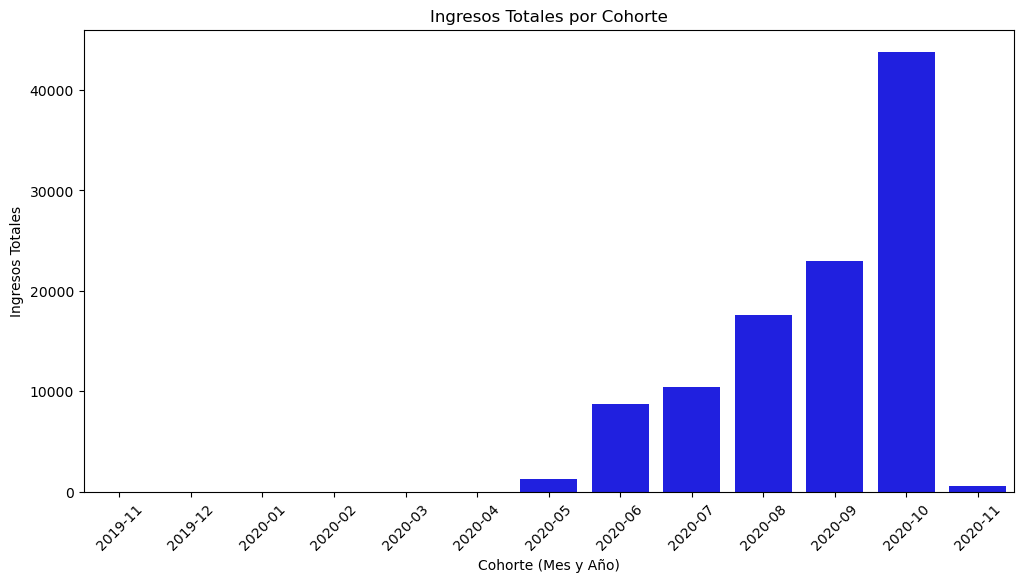

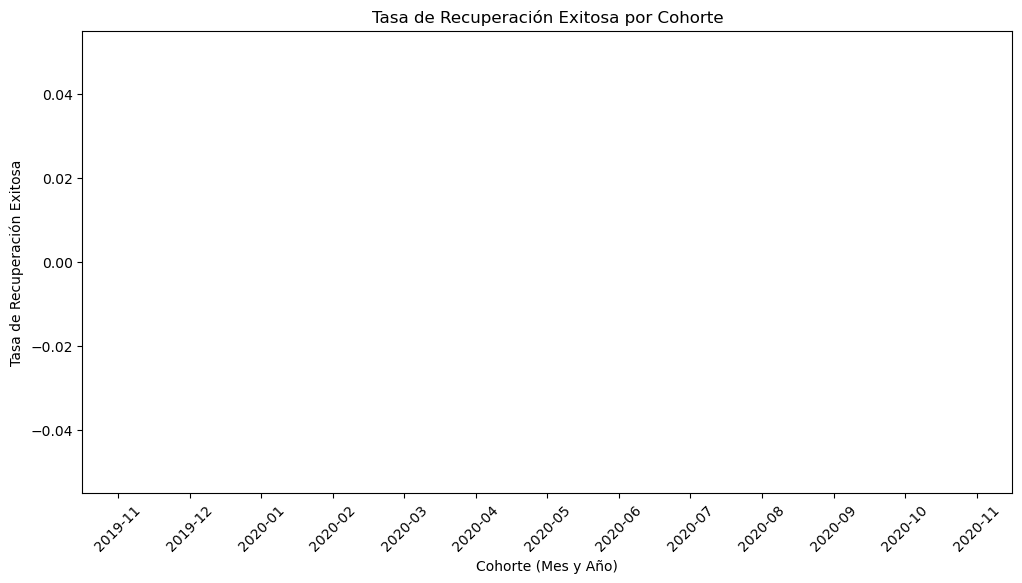

In [350]:
# Visualización de resultados

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_revenue, x='Cohorte', y='Ingresos Totales', color='blue')
plt.title('Ingresos Totales por Cohorte')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_metrics, x='Cohorte', y='Tasa de Recuperación Exitosa', color='green')
plt.title('Tasa de Recuperación Exitosa por Cohorte')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de Recuperación Exitosa')
plt.xticks(rotation=45)
plt.show()


In [352]:
# Puesto que todas las 

In [354]:
df1

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [356]:
df2

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


In [358]:
merged_df

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,accepted,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after
32090,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,accepted,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before
32091,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,accepted,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after
32092,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,accepted,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before


In [360]:
merged_df2

,id_x,created_at_x,total_amount,recovery_status,reimbursement_date,cohort,reembolsado,monto_reembolsado
0,5,2019-12-10 19:05:21.596873+00:00,NaN,NaN,2020-01-09 19:05:21.596363+00,2019-12,True,NaN
1,70,2019-12-10 19:50:12.347780+00:00,NaN,NaN,2020-01-09 19:50:12.34778+00,2019-12,True,NaN
2,7,2019-12-10 19:13:35.825460+00:00,NaN,NaN,2020-01-09 19:13:35.825041+00,2019-12,True,NaN
3,10,2019-12-10 19:16:10.880172+00:00,NaN,NaN,2020-01-09 19:16:10.879606+00,2019-12,True,NaN
4,1594,2020-05-06 09:59:38.877376+00:00,NaN,NaN,2020-06-05 22:00:00+00,2020-05,True,NaN
...,...,...,...,...,...,...,...,...
32089,22357,2020-10-20 07:58:04.006937+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0
32090,20256,2020-10-10 05:40:55.700422+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0
32091,20256,2020-10-10 05:40:55.700422+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0
32092,19886,2020-10-08 14:16:52.155661+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0


In [362]:
merged_df2_clean

,id_x,created_at_x,total_amount,recovery_status,reimbursement_date,cohort,reembolsado,monto_reembolsado,aprobada
0,5,2019-12-10 19:05:21.596873+00:00,NaN,NaN,2020-01-09 19:05:21.596363+00,2019-12,True,NaN,False
1,70,2019-12-10 19:50:12.347780+00:00,NaN,NaN,2020-01-09 19:50:12.34778+00,2019-12,True,NaN,False
2,7,2019-12-10 19:13:35.825460+00:00,NaN,NaN,2020-01-09 19:13:35.825041+00,2019-12,True,NaN,False
3,10,2019-12-10 19:16:10.880172+00:00,NaN,NaN,2020-01-09 19:16:10.879606+00,2019-12,True,NaN,False
4,1594,2020-05-06 09:59:38.877376+00:00,NaN,NaN,2020-06-05 22:00:00+00,2020-05,True,NaN,False
...,...,...,...,...,...,...,...,...,...
32089,22357,2020-10-20 07:58:04.006937+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0,False
32090,20256,2020-10-10 05:40:55.700422+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0,False
32091,20256,2020-10-10 05:40:55.700422+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0,False
32092,19886,2020-10-08 14:16:52.155661+00:00,5.0,NaN,2021-02-05 11:00:00+00,2020-10,True,5.0,False


In [364]:
merged_df_clean = merged_df

merged_df_clean

merged_df_clean.groupby("status_x").sum()

#merged_df2_clean["reembolsado"].sum()

,id_x,amount,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
status_x,,,,,,,,,,,,,,,,,,,,,
active,2284630,13825.0,2020-07-01 09:30:03.14541+002020-07-01 09:30:0...,2020-08-11 22:27:58.240406+002020-08-11 22:27:...,4929215.0,2020-07-01 16:44:53.070844+002020-07-01 16:44:...,0.0,2020-08-03 22:00:00+002020-08-03 22:00:00+0020...,2020-07-032020-07-032020-07-032020-07-032020-0...,2020-06-11 22:37:13.182826+002020-08-06 22:00:...,...,cancelledcancelledcancelledcancelledcancelledr...,month_delay_on_paymentrejected_direct_debitmon...,775.0,Postpone Cash Request 6098Postpone Cash Reques...,2020-08-13 10:58:39.63422+002020-08-13 10:58:5...,2020-10-13 14:25:16.660127+002020-10-13 14:25:...,2020-06-25 23:41:23.810387+002020-07-12 04:34:...,2020-08-03 22:00:00+002020-08-03 22:00:00+0020...,2020-09-03 10:58:32.274+002020-09-03 10:58:32....,afterafterafterafterafterafterafterafteraftera...
canceled,407411,2721.0,2020-06-28 12:06:33.71284+002020-06-29 06:26:3...,2020-06-28 12:06:33.712853+002020-06-29 06:26:...,235310.0,2020-07-29 16:10:38+002020-09-01 17:22:40+0020...,130344.0,2020-07-07 22:00:00+002020-07-31 22:00:00+0020...,2020-09-04,2020-10-11 22:00:00+002020-10-11 22:00:00+00,...,rejectedrejectedconfirmedconfirmedrejectedcanc...,rejected_direct_debitrejected_direct_debit,30.0,Instant Payment Cash Request 12838rejected dir...,2020-08-17 19:05:49.830145+002020-09-03 15:45:...,2020-10-13 14:25:09.68019+002020-10-13 14:25:0...,2020-09-07 14:39:58.670351+002020-09-07 14:39:...,0,0,afterafterafterafterafterafter
direct_debit_rejected,25727991,157959.0,2020-06-17 11:03:32.61712+002020-06-17 11:03:3...,2020-07-21 22:09:32.695508+002020-07-21 22:09:...,60544935.0,2020-06-17 14:52:56.14175+002020-06-17 14:52:5...,722081.0,2020-07-17 11:03:52.469+002020-07-17 11:03:52....,2020-06-182020-06-182020-06-182020-06-182020-0...,2020-07-02 18:47:17.295625+002020-07-02 18:47:...,...,rejectedrejectedrejectedrejectedcancelledrejec...,rejected_direct_debitmonth_delay_on_paymentmon...,9290.0,rejected direct debitmonth delay on payment - ...,2020-07-21 22:09:32.585036+002020-08-20 23:11:...,2020-10-13 14:25:00.836605+002020-10-13 14:25:...,2020-08-06 08:42:18.59726+002020-07-07 05:35:0...,2020-07-30 22:00:00+002020-08-15 05:34:55.649+...,2020-08-15 05:34:55.649+002020-08-30 05:34:55....,afterafterafterafterafterafterafterafterbefore...
direct_debit_sent,1241205,6710.0,2020-08-08 18:20:28.454918+002020-08-08 18:20:...,2020-09-09 10:07:25.743348+002020-09-09 10:07:...,2687797.0,2020-08-17 07:35:42.551778+002020-08-17 07:35:...,0.0,2020-09-27 22:00:00+002020-09-27 22:00:00+0020...,2020-08-112020-08-112020-08-112020-08-182020-0...,2020-06-10 03:42:00.436408+002020-12-23 08:21:...,...,rejectedcancelledcancelledcancelledcancelledre...,rejected_direct_debitmonth_delay_on_paymentrej...,360.0,rejected direct debitPostpone Cash Request 115...,2020-09-06 22:09:12.979847+002020-08-25 17:18:...,2020-10-13 14:25:09.281636+002020-10-13 14:25:...,2020-09-18 08:56:59.846076+002021-02-11 04:25:...,2020-08-28 23:51:00+002020-08-28 23:51:00+0020...,2020-09-27 23:51:00+002020-09-27 23:51:00+0020...,afterafterafterafterafterafterafterafteraftera...
money_back,344652798,1946958.0,2020-05-23 20:58:55.129432+002020-05-14 21:11:...,2020-07-06 03:36:03.023911+002020-06-03 05:11:...,759119993.0,2020-05-24 12:40:33.05491+002020-05-15 09:11:1...,17933438.0,2020-06-06 22:00:00+002020-05-29 21:11:46.695+...,2020-05-262020-05-172020-05-272020-05-122020-0...,2020-07-06 03:36:03.023521+002020-06-03 05:11:...,...,acceptedacceptedacceptedacceptedcancelledaccep...,rejected_direct_debitmonth_delay_on_paymentrej...,94595.0,Instant Payment Cash Request 23534Postpone Cas...,2020-10-23 15:21:35.895711+002020-06-09 11:25:...,2020-10-23 15:21:35.89574+002020-10-13 14:25:0...,2020-11-06 07:16:22.014422+002020-10-17 05:30:

    Cohorte  Total Solicitudes  Solicitudes Aprobadas  \
0   2019-11                  1                    0.0   
1   2019-12                289                    0.0   
2   2020-01                223                    0.0   
3   2020-02                184                    0.0   
4   2020-03                244                    0.0   
5   2020-04                473                    0.0   
6   2020-05                997                    0.0   
7   2020-06               3662                    0.0   
8   2020-07               4793                    0.0   
9   2020-08               5250                    0.0   
10  2020-09               6227                    0.0   
11  2020-10               9611                    0.0   
12  2020-11                140                    0.0   

    Tasa de Solicitudes Aprobadas  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                    

TypeError: Invalid object type at position 0

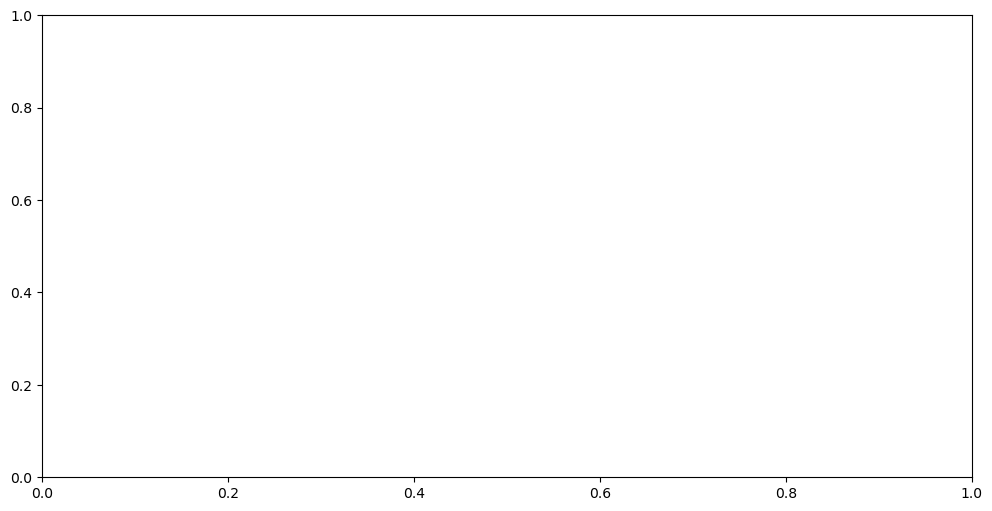

In [365]:
# Crear una columna binaria que indique si la solicitud fue aprobada
merged_df2['aprobada'] = merged_df2['recovery_status'] == 'approved'

# Aseguramos que la columna 'aprobada' solo tenga valores no nulos
merged_df2['aprobada'] = merged_df2['aprobada'].fillna(False)  # Para evitar valores nulos

# Calcular la cantidad total de solicitudes por cohorte
cohort_counts = merged_df2.groupby('cohort')['id_x'].count().reset_index()
cohort_counts.columns = ['Cohorte', 'Total Solicitudes']

# Calcular la cantidad de solicitudes aprobadas por cohorte
approved_requests = merged_df2[merged_df2['aprobada']].groupby('cohort')['id_x'].count().reset_index()
approved_requests.columns = ['Cohorte', 'Solicitudes Aprobadas']

# Combinar los dos resultados en un dataframe
cohort_approval_rate = pd.merge(cohort_counts, approved_requests, on='Cohorte', how='left')

# Calcular la tasa de solicitudes aprobadas
cohort_approval_rate['Tasa de Solicitudes Aprobadas'] = cohort_approval_rate['Solicitudes Aprobadas'] / cohort_approval_rate['Total Solicitudes']

# Llenar valores nulos con 0 para cohortes sin solicitudes aprobadas
cohort_approval_rate['Solicitudes Aprobadas'] = cohort_approval_rate['Solicitudes Aprobadas'].fillna(0)
cohort_approval_rate['Tasa de Solicitudes Aprobadas'] = cohort_approval_rate['Tasa de Solicitudes Aprobadas'].fillna(0)


# Mostrar los resultados
print(cohort_approval_rate)


plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_approval_rate, x='Cohorte', y='Tasa de Solicitudes Aprobadas', marker='o', color='blue')
plt.title('Tasa de Solicitudes Aprobadas por Cohorte')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de Solicitudes Aprobadas')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


In [369]:
contador = 0

for elements in merged_df['recovery_status']:
    if elements == 'rejected':
        contador += 1

print(contador)

0


In [375]:
# Crear una columna binaria que indique si la solicitud fue aprobada
merged_df2['aprobada'] = merged_df2['recovery_status'] == 'approved'

# Aseguramos que la columna 'aprobada' solo tenga valores no nulos
merged_df2['aprobada'] = merged_df2['aprobada'].fillna(True)  # Para evitar valores nulos

merged_df2['aprobada']

0


0        False
1        False
2        False
3        False
4        False
         ...  
32089    False
32090    False
32091    False
32092    False
32093    False
Name: aprobada, Length: 32094, dtype: bool